In [1]:
import pandas as pd
from fpdf import FPDF
import matplotlib.pyplot as plt
import os

In [ ]:
### Upcoming fights

df = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

print(df)

In [ ]:
### Generate Report

# Load the fight data
fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Load the fighter info
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Create instance of FPDF class
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a page
pdf.add_page()

# Set font for the title
pdf.set_font('Arial', 'B', 24)
pdf.set_text_color(0, 0, 255)
pdf.cell(0, 20, 'DWCS Upcoming Event Report', 0, 1, 'C')

# Set font for the content
pdf.set_font('Arial', '', 12)
pdf.set_text_color(0)

for i in range(len(fight_data)):
    fight = fight_data.iloc[i]
    fighter1_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 1']].iloc[0]
    fighter2_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 2']].iloc[0]

    # Bout details
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'Bout ' + str(i + 1), 0, 1, 'L')

    pdf.set_font('Arial', 'I', 12)
    pdf.cell(0, 10, 'Fighter 1: ' + fight['Fighter 1'], 0, 1, 'L')
    pdf.cell(0, 10, 'Fighter 2: ' + fight['Fighter 2'], 0, 1, 'L')
    pdf.cell(0, 10, 'Weight Class: ' + fight['Weight Class'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Date: ' + fight['Event Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Location: ' + fight['Event Location'], 0, 1, 'L')

    # Fighter 1 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 1 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter1_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter1_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter1_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter1_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter1_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter1_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter1_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter1_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter1_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter1_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter1_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter1_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter1_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter1_detail['Loss_Sub']), 0, 1, 'L')

    # Fighter 2 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 2 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter2_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter2_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter2_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter2_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter2_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter2_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter2_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter2_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter2_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter2_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter2_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter2_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter2_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter2_detail['Loss_Sub']), 0, 1, 'L')

    pdf.cell(0, 10, '', 0, 1, 'L')  # Empty line

# Save the PDF
pdf.output('DWCS_Upcoming_Event_Report.pdf')


In [ ]:
### Visualizations for Report

fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Extract win methods for each fighter
win_methods = fighter_info[['Wins', 'Win_KO', 'Win_Sub', 'Win_Decision']]

# Create a pie chart for the first fighter
fig, ax = plt.subplots()
ax.pie(win_methods.iloc[0, 1:], labels=['KO', 'Submission', 'Decision'], autopct='%1.1f%%')
ax.set_title('Win Methods for ' + fighter_info['Fighter'].iloc[0])

plt.show()

NameError: name 'fighter1_info' is not defined

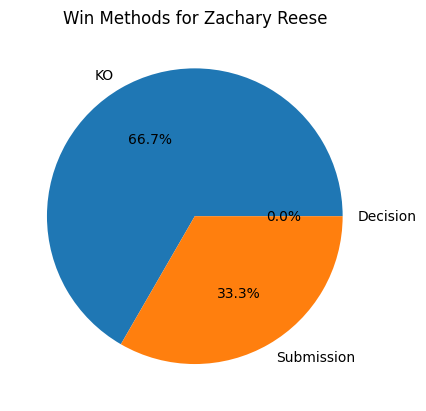

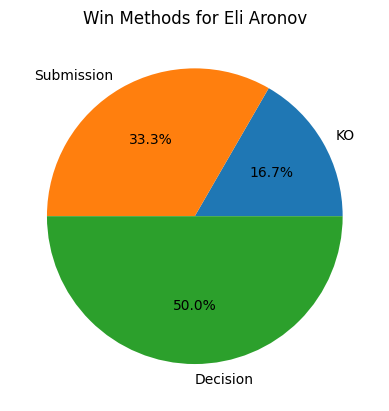

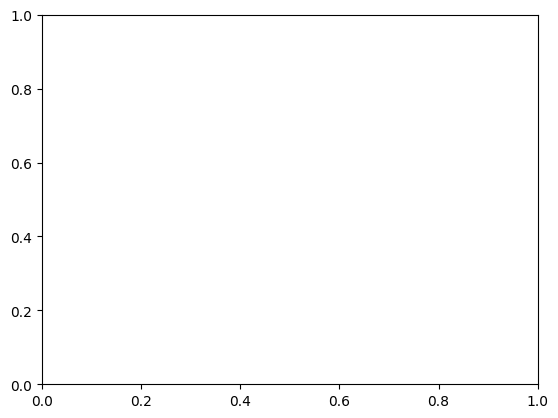

In [2]:
### Generate Report (with visualizations)

# Load the fight data
fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Load the fighter info
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Create instance of FPDF class
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a page
pdf.add_page()

# Set font for the title
pdf.set_font('Arial', 'B', 24)
pdf.set_text_color(0, 0, 255)
pdf.cell(0, 20, 'DWCS Upcoming Event Report', 0, 1, 'C')

# Loop through fight data
for i in range(len(fight_data)):
    fight = fight_data.iloc[i]
    fighter1_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 1']].iloc[0]
    fighter2_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 2']].iloc[0]

    # Add a page
    pdf.add_page()

    # Set font for the content
    pdf.set_font('Arial', '', 12)
    pdf.set_text_color(0)

    # Add fight details
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'Bout ' + str(i + 1), 0, 1, 'L')

    pdf.set_font('Arial', 'I', 12)
    pdf.cell(0, 10, 'Fighter 1: ' + fight['Fighter 1'], 0, 1, 'L')
    pdf.cell(0, 10, 'Fighter 2: ' + fight['Fighter 2'], 0, 1, 'L')
    pdf.cell(0, 10, 'Weight Class: ' + fight['Weight Class'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Date: ' + fight['Event Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Location: ' + fight['Event Location'], 0, 1, 'L')

    # Add fighter 1 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 1 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter1_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter1_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter1_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter1_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter1_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter1_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter1_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter1_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter1_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter1_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter1_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter1_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter1_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter1_detail['Loss_Sub']), 0, 1, 'L')

    # Add fighter 2 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 2 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter2_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter2_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter2_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter2_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter2_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter2_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter2_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter2_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter2_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter2_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter2_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter2_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter2_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter2_detail['Loss_Sub']), 0, 1, 'L')

    pdf.cell(0, 10, '', 0, 1, 'L')  # Empty line

    # Visualizations for Report

    # Create a pie chart for the first fighter
    fig, ax = plt.subplots()
    win_methods = fighter_info[['Win_KO', 'Win_Sub', 'Win_Decision']].iloc[0]
    ax.pie(win_methods, labels=['KO', 'Submission', 'Decision'], autopct='%1.1f%%')
    ax.set_title('Win Methods for ' + fighter_info['Fighter'].iloc[0])

    # Save the chart to a file
    chart_filename = f'fighter_{i + 1}_win_methods.png'
    fig.savefig(chart_filename)
    pdf.image(chart_filename, x=10, y=pdf.get_y(), w=0, h=80)
    
    #### Adding
    
#     # Create a pie chart for the second fighter
#     fig, ax = plt.subplots()
#     win_methods = fighter_info[['Win_KO', 'Win_Sub', 'Win_Decision']].iloc[1]
#     ax.pie(win_methods, labels=['KO', 'Submission', 'Decision'], autopct='%1.1f%%')
#     ax.set_title('Win Methods for ' + fighter_info['Fighter'].iloc[1])

#     # Save the chart to a file
#     chart_filename = f'fighter_{i + 1}_win_methods.png'
#     fig.savefig(chart_filename)
#     pdf.image(chart_filename, x=10, y=pdf.get_y(), w=0, h=80)
    
    
#     # Create the bar chart for fighter 1
#     fig, ax = plt.subplots()
#     ax.bar(['Wins', 'Losses'], [fighter1_info['Wins'], fighter1_info['Losses']])
#     save_and_add_figure(fig, pdf, f'fighter_{i + 1}_wins_losses_{fight["Fighter 1"]}')

#     # Create the bar chart for fighter 2
#     fig, ax = plt.subplots()
#     ax.bar(['Wins', 'Losses'], [fighter2_info['Wins'], fighter2_info['Losses']])
#     save_and_add_figure(fig, pdf, f'fighter_{i + 1}_wins_losses_{fight["Fighter 2"]}')
    
    #### Done Adding

    plt.close(fig)  # Close the figure to free up memory
    
    

# Save the PDF
pdf.output('DWCS_Upcoming_Event_Report.pdf')


In [ ]:
### Generate Report (with 2 visualizations)

import pandas as pd
from fpdf import FPDF
import matplotlib.pyplot as plt

# Function to save figure and add it to PDF
def save_and_add_figure(fig, pdf, title):
    chart_filename = f'{title}.png'
    fig.savefig(chart_filename)
    pdf.image(chart_filename, x=10, y=pdf.get_y(), w=0, h=80)
    plt.close(fig)

### Generate Report

# Load the fight data
fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Load the fighter info
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Create instance of FPDF class
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a page
pdf.add_page()

# Set font for the title
pdf.set_font('Arial', 'B', 24)
pdf.set_text_color(0, 0, 255)
pdf.cell(0, 20, 'DWCS Upcoming Event Report', 0, 1, 'C')

# Loop through fight data
for i in range(len(fight_data)):
    fight = fight_data.iloc[i]
    fighter1_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 1']].iloc[0]
    fighter2_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 2']].iloc[0]

    # Add a page
    pdf.add_page()

    # Set font for the content
    pdf.set_font('Arial', '', 12)
    pdf.set_text_color(0)

    # Add fight details
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'Bout ' + str(i + 1), 0, 1, 'L')

    pdf.set_font('Arial', 'I', 12)
    pdf.cell(0, 10, 'Fighter 1: ' + fight['Fighter 1'], 0, 1, 'L')
    pdf.cell(0, 10, 'Fighter 2: ' + fight['Fighter 2'], 0, 1, 'L')
    pdf.cell(0, 10, 'Weight Class: ' + fight['Weight Class'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Date: ' + fight['Event Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Location: ' + fight['Event Location'], 0, 1, 'L')

    # Add fighter 1 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 1 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter1_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter1_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter1_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter1_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter1_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter1_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter1_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter1_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter1_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter1_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter1_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter1_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter1_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter1_detail['Loss_Sub']), 0, 1, 'L')

    # Add fighter 2 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 2 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter2_detail['Nickname'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + fighter2_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter2_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter2_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter2_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter2_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter2_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter2_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter2_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter2_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter2_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter2_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter2_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter2_detail['Loss_Sub']), 0, 1, 'L')

    pdf.cell(0, 10, '', 0, 1, 'L')  # Empty line

    # Get the fighter info
    fighter1_info = fighter_info[fighter_info['Fighter'] == fight['Fighter 1']].iloc[0]
    fighter2_info = fighter_info[fighter_info['Fighter'] == fight['Fighter 2']].iloc[0]

    # Create the bar chart for fighter 1
    fig, ax = plt.subplots()
    ax.bar(['Wins', 'Losses'], [fighter1_info['Wins'], fighter1_info['Losses']])
    save_and_add_figure(fig, pdf, f'fighter_{i + 1}_wins_losses_{fight["Fighter 1"]}')

    # Create the bar chart for fighter 2
    fig, ax = plt.subplots()
    ax.bar(['Wins', 'Losses'], [fighter2_info['Wins'], fighter2_info['Losses']])
    save_and_add_figure(fig, pdf, f'fighter_{i + 1}_wins_losses_{fight["Fighter 2"]}')

# Save the PDF
pdf.output('DWCS_Upcoming_Event_Report.pdf')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import os

# Load the data
upcoming_fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Function to convert height from feet'inches" format to cm
def convert_height(height):
    if pd.isna(height):
        return None
    try:
        feet, inches = height.split("'")
        inches, _ = inches.split('"')
        return int(feet) * 30.48 + int(inches) * 2.54
    except ValueError:
        return None

# Convert height from string to float
fighter_info['Height'] = fighter_info['Height'].apply(convert_height)

# Function to add a matplotlib figure to a PDF file
def add_figure_to_pdf(fig, pdf, title):
    plt.title(title)
    plt.savefig('./data-dwcs/temp.png')
    pdf.image('./data-dwcs/temp.png')
    os.remove('./data-dwcs/temp.png')

# Create a PDF document
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# Add a title to the PDF
pdf.cell(200, 10, txt="DWCS Upcoming Event Report", ln=True, align='C')

# Add the scatter plot to the PDF
fig, ax = plt.subplots()
ax.scatter(fighter_info['Height'], fighter_info['Wins'])
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Wins')
add_figure_to_pdf(fig, pdf, 'Height vs Wins')

# Add the bar charts to the PDF
for i, row in upcoming_fight_data.iterrows():
    # Get the fighter info
    fighter1_info = fighter_info[fighter_info['Fighter'] == row['Fighter 1']].iloc[0]
    fighter2_info = fighter_info[fighter_info['Fighter'] == row['Fighter 2']].iloc[0]
    
    # Create the bar chart for fighter 1
    fig, ax = plt.subplots()
    ax.bar(['Wins', 'Losses'], [fighter1_info['Wins'], fighter1_info['Losses']])
    add_figure_to_pdf(fig, pdf, 'Wins and Losses for ' + row['Fighter 1'])
    
    # Create the bar chart for fighter 2
    fig, ax = plt.subplots()
    ax.bar(['Wins', 'Losses'], [fighter2_info['Wins'], fighter2_info['Losses']])
    add_figure_to_pdf(fig, pdf, 'Wins and Losses for ' + row['Fighter 2'])

# Save the PDF
pdf.output('./DWCS_Upcoming_Event_Report.pdf')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import os

# Load the fight data
fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Load the fighter info
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Function to convert height from feet'inches" format to cm
def convert_height(height):
    if pd.isna(height):
        return None
    try:
        feet, inches = height.split("'")
        inches, _ = inches.split('"')
        return int(feet) * 30.48 + int(inches) * 2.54
    except ValueError:
        return None

# Convert height from string to float
fighter_info['Height'] = fighter_info['Height'].apply(convert_height)

# Function to add a matplotlib figure to a PDF file
def add_figure_to_pdf(fig, pdf, title):
    plt.title(title)
    plt.savefig('./temp.png')
    pdf.image('./temp.png')
    os.remove('./temp.png')

# Create instance of FPDF class
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)

# Add a page
pdf.add_page()

# Set font for the title
pdf.set_font('Arial', 'B', 24)
pdf.set_text_color(0, 0, 255)
pdf.cell(0, 20, 'DWCS Upcoming Event Report', 0, 1, 'C')

# Add the scatter plot to the PDF
fig, ax = plt.subplots()
ax.scatter(fighter_info['Height'], fighter_info['Wins'])
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Wins')
add_figure_to_pdf(fig, pdf, 'Height vs Wins')

# Set font for the content
pdf.set_font('Arial', '', 12)
pdf.set_text_color(0)

for i in range(len(fight_data)):
    fight = fight_data.iloc[i]
    fighter1_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 1']].iloc[0]
    fighter2_detail = fighter_info[fighter_info['Fighter'] == fight['Fighter 2']].iloc[0]

    # Bout details
    pdf.set_font('Arial', 'B', 14)
    pdf.cell(0, 10, 'Bout ' + str(i + 1), 0, 1, 'L')

    pdf.set_font('Arial', 'I', 12)
    pdf.cell(0, 10, 'Fighter 1: ' + fight['Fighter 1'], 0, 1, 'L')
    pdf.cell(0, 10, 'Fighter 2: ' + fight['Fighter 2'], 0, 1, 'L')
    pdf.cell(0, 10, 'Weight Class: ' + fight['Weight Class'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Date: ' + fight['Event Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Event Location: ' + fight['Event Location'], 0, 1, 'L')

    # Add the bar chart for fighter 1
#    fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(2, 1.5))
    ax.bar(['Wins', 'Losses'], [fighter1_detail['Wins'], fighter1_detail['Losses']])
    add_figure_to_pdf(fig, pdf, 'Wins and Losses for ' + fight['Fighter 1'])

    # Fighter 1 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 1 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter1_detail['Nickname'], 0, 1, 'L')
#    pdf.cell(0, 10, 'Height: ' + fighter1_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + str(fighter1_detail['Height']), 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter1_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter1_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter1_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter1_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter1_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter1_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter1_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter1_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter1_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter1_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter1_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter1_detail['Loss_Sub']), 0, 1, 'L')

    # Add the bar chart for fighter 2
#    fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(2, 1.5))
    ax.bar(['Wins', 'Losses'], [fighter2_detail['Wins'], fighter2_detail['Losses']])
    add_figure_to_pdf(fig, pdf, 'Wins and Losses for ' + fight['Fighter 2'])

    # Fighter 2 details
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, 'Fighter 2 Details:', 0, 1, 'L')

    pdf.set_font('Arial', '', 12)
    pdf.cell(0, 10, 'Nickname: ' + fighter2_detail['Nickname'], 0, 1, 'L')
#    pdf.cell(0, 10, 'Height: ' + fighter2_detail['Height'], 0, 1, 'L')
    pdf.cell(0, 10, 'Height: ' + str(fighter2_detail['Height']), 0, 1, 'L')
    pdf.cell(0, 10, 'Birth Date: ' + fighter2_detail['Birth Date'], 0, 1, 'L')
    pdf.cell(0, 10, 'Nationality: ' + fighter2_detail['Nationality'], 0, 1, 'L')
    pdf.cell(0, 10, 'Hometown: ' + fighter2_detail['Hometown'], 0, 1, 'L')
    pdf.cell(0, 10, 'Association: ' + fighter2_detail['Association'], 0, 1, 'L')
    pdf.cell(0, 10, 'Wins: ' + str(fighter2_detail['Wins']), 0, 1, 'L')
    pdf.cell(0, 10, 'Losses: ' + str(fighter2_detail['Losses']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Decision: ' + str(fighter2_detail['Win_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Decision: ' + str(fighter2_detail['Loss_Decision']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by KO: ' + str(fighter2_detail['Win_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Win by Submission: ' + str(fighter2_detail['Win_Sub']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by KO: ' + str(fighter2_detail['Loss_KO']), 0, 1, 'L')
    pdf.cell(0, 10, 'Loss by Submission: ' + str(fighter2_detail['Loss_Sub']), 0, 1, 'L')

    pdf.cell(0, 10, '', 0, 1, 'L')  # Empty line

# Save the PDF
pdf.output('DWCS_Upcoming_Event_Report.pdf')


# Old Split Version

In [ ]:
### GPT Generate Report (basic working)

# Load the fight data
fight_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Define the PDF class
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Dana White\'s Contender Series - Contender Series 2023: Week 4', 0, 1, 'C')
    
    def chapter_title(self, num, label):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Fight %d : %s' % (num, label), 0, 1, 'L')
        self.ln(5)
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

# Create PDF object
pdf = PDF()

# Add a page
pdf.add_page()

# Add a title
pdf.set_title('Dana White\'s Contender Series - Contender Series 2023: Week 4')

# Add fights to PDF
for i in range(len(fight_data)):
    fight = fight_data.iloc[i]
    pdf.chapter_title(i+1, fight['Fighter 1'] + ' vs ' + fight['Fighter 2'])
    pdf.chapter_body('Event Name: Dana White\'s Contender Series - Contender Series 2023: Week 4\n'
                     'Event Location: UFC Apex, Las Vegas, Nevada, United States\n'
                     'Event Date: Aug 29, 2023\n'
                     'Fighter 1: ' + fight['Fighter 1'] + '\n'
                     'Fighter 2: ' + fight['Fighter 2'] + '\n'
                     'Weight Class: ' + fight['Weight Class'])

# Save the PDF
pdf.output('DWCS_Upcoming_Event_Report.pdf')


In [ ]:
### Add details from fighter info

# Load the DWCS_Upcoming_Event_Data_Sherdog.csv file
upcoming_event_data = pd.read_csv('./data-dwcs/DWCS_Upcoming_Event_Data_Sherdog.csv')

# Load the DWCS_Fighter_Info.csv file
fighter_info = pd.read_csv('./data-dwcs/DWCS_Fighter_Info.csv')

# Find the index of each fighter in 'DWCS_Upcoming_Event_Data_Sherdog.csv' in 'DWCS_Fighter_Info.csv'
fighter1_indices = fighter_info[fighter_info['Fighter'].isin(upcoming_event_data['Fighter 1'])].index.tolist()
fighter2_indices = fighter_info[fighter_info['Fighter'].isin(upcoming_event_data['Fighter 2'])].index.tolist()
#fighter1_indices, fighter2_indices

# Extract the details of each fighter using the indices
fighter1_details = fighter_info.loc[fighter1_indices]
fighter2_details = fighter_info.loc[fighter2_indices]

# Display the extracted details
fighter1_details, fighter2_details

In [ ]:
### continued

# Create instance of FPDF class
pdf = FPDF()

# Add a page
pdf.add_page()

# Set font
pdf.set_font('Arial', 'B', 16)

# Adding a cell
pdf.cell(200, 10, txt = 'DWCS Upcoming Event Report', ln = True, align = 'C')

# Set font
pdf.set_font('Arial', '', 12)

for i in range(len(upcoming_event_data)):
    bout = upcoming_event_data.iloc[i]
    fighter1_detail = fighter1_details.iloc[i]
    fighter2_detail = fighter2_details.iloc[i]

    # Bout details
    pdf.cell(200, 10, txt = 'Bout ' + str(i+1), ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Fighter 1: ' + bout['Fighter 1'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Fighter 2: ' + bout['Fighter 2'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Weight Class: ' + bout['Weight Class'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Event Date: ' + bout['Event Date'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Event Location: ' + bout['Event Location'], ln = True, align = 'L')

    # Fighter 1 details
    pdf.cell(200, 10, txt = 'Fighter 1 Details:', ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Nickname: ' + fighter1_detail['Nickname'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Height: ' + fighter1_detail['Height'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Nationality: ' + fighter1_detail['Nationality'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Hometown: ' + fighter1_detail['Hometown'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Association: ' + fighter1_detail['Association'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Wins: ' + str(fighter1_detail['Wins']), ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Losses: ' + str(fighter1_detail['Losses']), ln = True, align = 'L')

    # Fighter 2 details
    pdf.cell(200, 10, txt = 'Fighter 2 Details:', ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Nickname: ' + fighter2_detail['Nickname'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Height: ' + fighter2_detail['Height'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Nationality: ' + fighter2_detail['Nationality'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Hometown: ' + fighter2_detail['Hometown'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Association: ' + fighter2_detail['Association'], ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Wins: ' + str(fighter2_detail['Wins']), ln = True, align = 'L')
    pdf.cell(200, 10, txt = 'Losses: ' + str(fighter2_detail['Losses']), ln = True, align = 'L')

    pdf.cell(200, 10, txt = '', ln = True, align = 'L')  # Empty line

# save the pdf with name .pdf
pdf.output('DWCS_Upcoming_Event_Report.pdf')

'DWCS_Upcoming_Event_Report.pdf'  # Return the name of the generated PDF file